## iris dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [23]:
iris.target.unique()

array([0, 1, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train , y_train)

LogisticRegression(random_state=42)

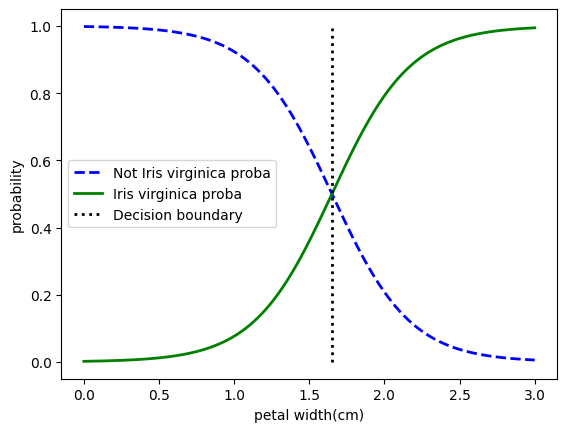

In [17]:
# reshape
import numpy as np
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_prob[:,1] >= 0.5][0,0]

plt.plot(X_new, y_prob[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_prob[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.legend(loc="center left")
plt.xlabel("petal width(cm)")
plt.ylabel("probability")
plt.show()

In [18]:
decision_boundary #  if the petal width is greater than 1.6 cm the classifier will predict that the flower is an Iris virginica

1.6516516516516517

In [20]:
log_reg.predict([[1.7] , [1]])

array([ True, False])

## Softmax Regression

In [21]:
X =iris.data[["petal length (cm)" , "petal width (cm)"]].values
y= iris["target"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42)

softmax_reg = LogisticRegression(C = 30 , random_state=42)
softmax_reg.fit(X_train , y_train)

LogisticRegression(C=30, random_state=42)

In [22]:
softmax_reg.predict([[5,2]])

array([2])

In [24]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])